In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dragon_curve import dragon_curve_with_angle_fn, dragon_curve
from plot_curve import plot_curve

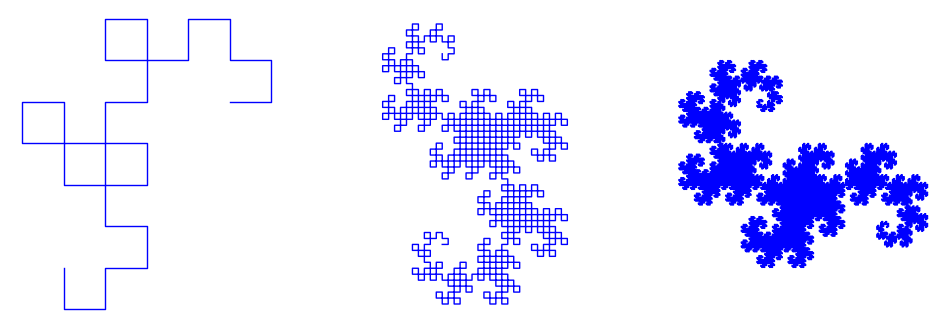

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plot_curve(dragon_curve(5), axes=ax[0])
plot_curve(dragon_curve(10), axes=ax[1])
plot_curve(dragon_curve(15), axes=ax[2])
plt.savefig('plots/dragon_curve.png', transparent=True)

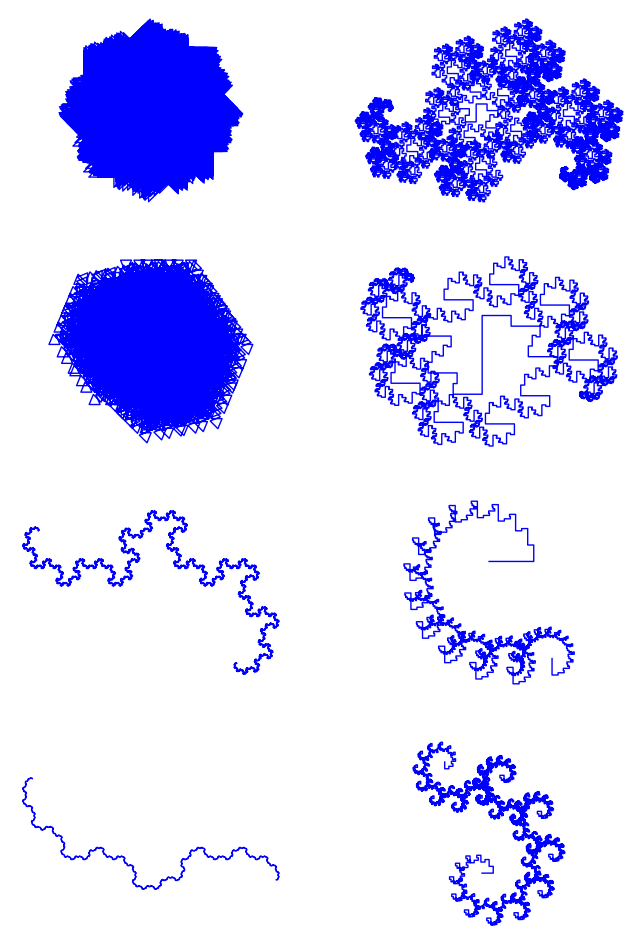

In [4]:
fig, ax = plt.subplots(4, 2, figsize=(8, 12))
plot_curve(dragon_curve(15, angle=np.pi * 6/8), axes=ax[0, 0])
plot_curve(dragon_curve(15, angle=np.pi * 5/8), axes=ax[1, 0])
plot_curve(dragon_curve(15, angle=np.pi * 3/8), axes=ax[2, 0])
plot_curve(dragon_curve(15, angle=np.pi * 2/8), axes=ax[3, 0])
plot_curve(dragon_curve(15, angle=np.pi/2 - 0.5j), axes=ax[0, 1])
plot_curve(dragon_curve(15, angle=np.pi/2 - 1j), axes=ax[1, 1])
plot_curve(dragon_curve(15, angle=np.pi/2 + 1j), axes=ax[2, 1])
plot_curve(dragon_curve(15, angle=np.pi/2 + 0.5j), axes=ax[3, 1])
plt.savefig('plots/const_angles.png', transparent=True)

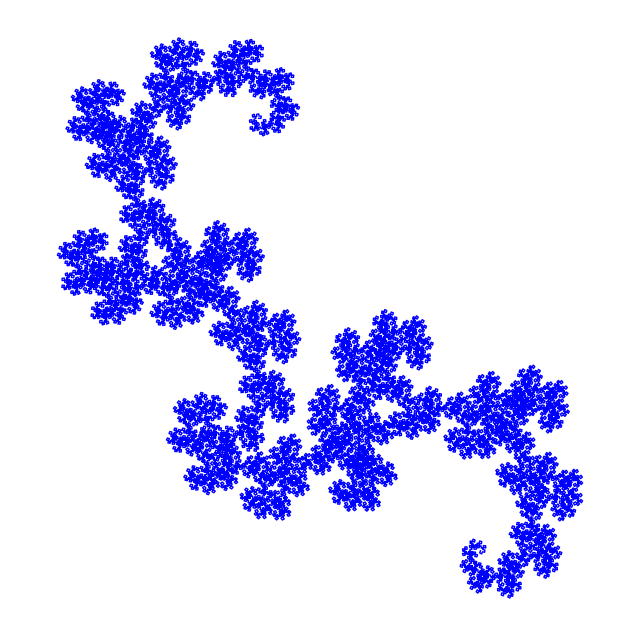

In [19]:
curve = dragon_curve_with_angle_fn(15, lambda _: (np.random.uniform(-0.125, 0.125) + 0.5) * np.pi)
plot_curve(curve)

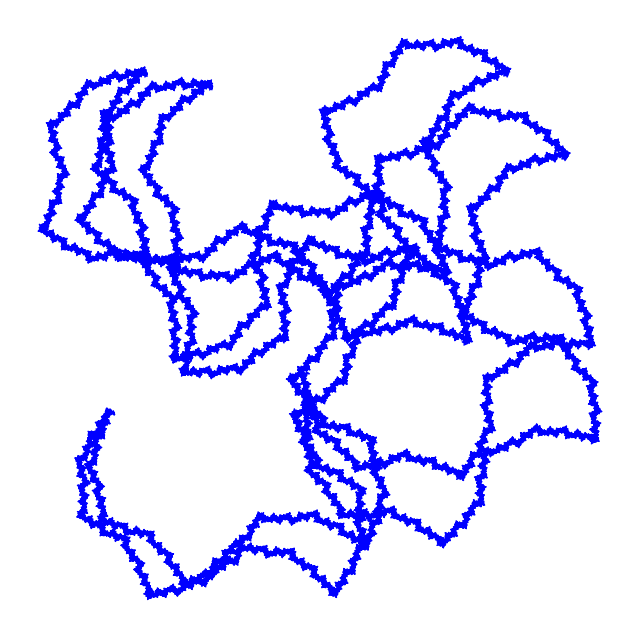

In [20]:
plot_curve(dragon_curve_with_angle_fn(15, lambda n: (np.pi) * (np.abs(n - 7.5)) / 8))

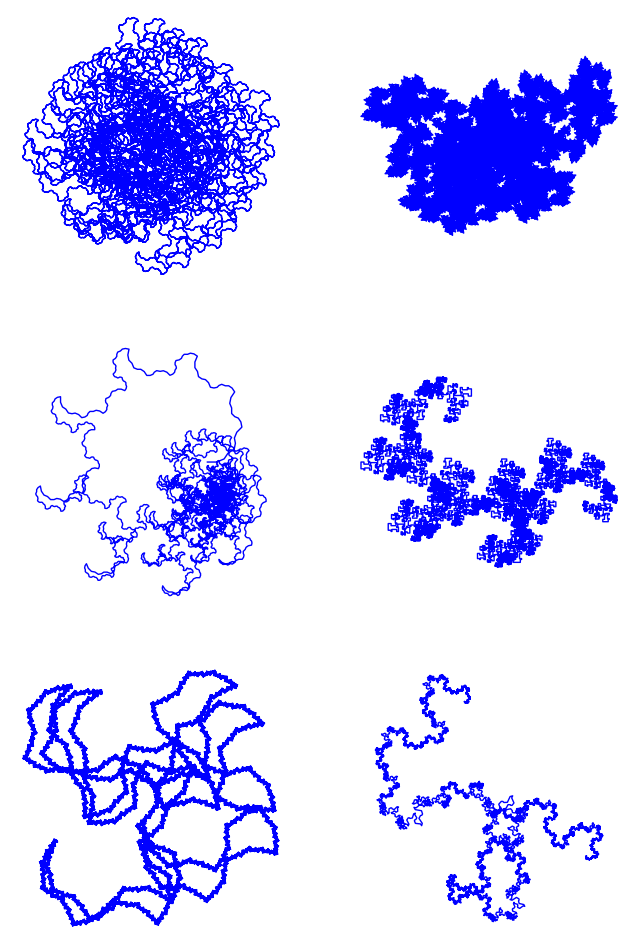

In [22]:
fig, ax = plt.subplots(3, 2, figsize=(8, 12))
plot_curve(dragon_curve_with_angle_fn(15, lambda n: np.pi * (1 - n / 16)), axes=ax[0, 0])
plot_curve(dragon_curve_with_angle_fn(15, lambda n: (np.pi + 1j) * (1 - n / 16)), axes=ax[1, 0])
plot_curve(dragon_curve_with_angle_fn(15, lambda n: np.pi * (np.abs(n - 7.5)) / 8), axes=ax[2, 0])
plot_curve(dragon_curve_with_angle_fn(15, lambda _: (np.random.uniform(-0.25, 0.25) + 0.5) * np.pi), axes=ax[0, 1])
plot_curve(dragon_curve_with_angle_fn(15, lambda _: np.pi / 2 + np.random.uniform(-1, 1) * 1j), axes=ax[1, 1])
plot_curve(dragon_curve_with_angle_fn(15, lambda _: (np.random.uniform(-0.25, 0.25) + 0.5) * np.pi + np.random.uniform(-1, 1) * 1j), axes=ax[2, 1])
plt.savefig('plots/fn_angles.png', transparent=True)